# Modelos Lineares Generalizados


## Objetivos

Iremos analisar o dataset multi.dat que contém 32 observações sobre os atributos pressão arterial(pa), idade(id), icm e hábito de fumar(hf). Desejamos verificar qual a relação entre id,hf e icm com pa. Para isso, inicialmente iremos realizar uma análise exploratória e depois iremos gerar um modelo que se ajuste aos dados.

## Análise exploratória dos dados

Verificaremos as seguintes hipóteses:

1 - A variável resposta (pa) segue uma normal ? <br>
2 - A relação entre as variáveis independentes e pa é linear ? <br>
3 - Existe diferença na pressão arterial entre os pacientes fumantes e não fumantes ? <br>

In [1]:
#Leitura dos dados
df = read.table("multi.dat")

#Tratando os dados
levels(df$hf) = c("nao","sim")

#Apresentação dos dados
head(df)

pessoa,pa,id,imc,hf
1,135,45,2876,nao
2,122,41,3251,nao
3,130,49,3100,nao
4,148,52,3768,nao
5,146,54,2979,sim
6,129,47,2790,sim


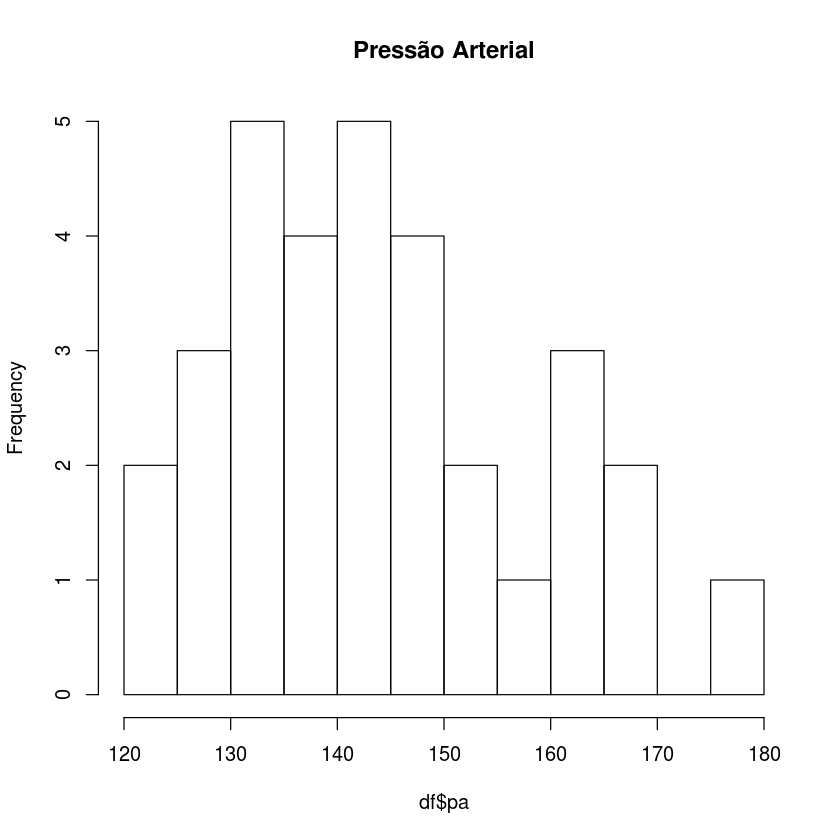

In [2]:
#Plotando o histograma
hist(df$pa,main="Pressão Arterial",breaks=20)

Aparentemente temos uma distribuição bimodal, então iremos realizar a separação por fumante e não fumante

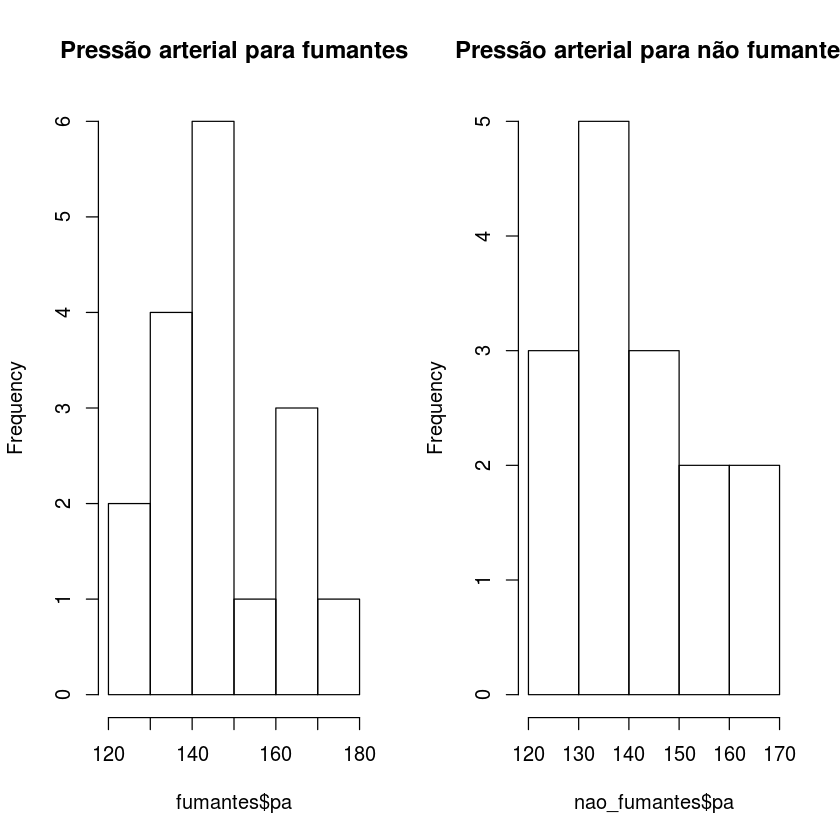

In [3]:
#Separação em fumantes e nao fumantes
fumantes = df[df$hf == "sim",]
nao_fumantes = df[df$hf != "sim",]

#Plotando histograma em separado
par(mfrow=c(1,2))
hist(fumantes$pa,main="Pressão arterial para fumantes")
hist(nao_fumantes$pa,main="Pressão arterial para não fumantes")

In [4]:
#Baseando na ideia de que aproximadamente 95% dos dados devem estar entre [mean-2sd,mean+2sd] para a normal, iremos calcular tais valores para
#verificar a normalidade de pa
minimo = mean(fumantes$pa) - (2 * sd(fumantes$pa))
maximo = mean(fumantes$pa) + (2 * sd(fumantes$pa))
cat("Proporção dos dados para fumantes: ",length(fumantes$pa[fumantes$pa > minimo & fumantes$pa < maximo]) / length(fumantes$pa),'\n')

minimo = mean(nao_fumantes$pa) - (2 * sd(nao_fumantes$pa))
maximo = mean(nao_fumantes$pa) + (2 * sd(nao_fumantes$pa))
cat("Proporção dos dados para fumantes: ",length(nao_fumantes$pa[nao_fumantes$pa > minimo & nao_fumantes$pa < maximo]) / length(nao_fumantes$pa),'\n')

Proporção dos dados para fumantes:  0.9411765 
Proporção dos dados para fumantes:  1 


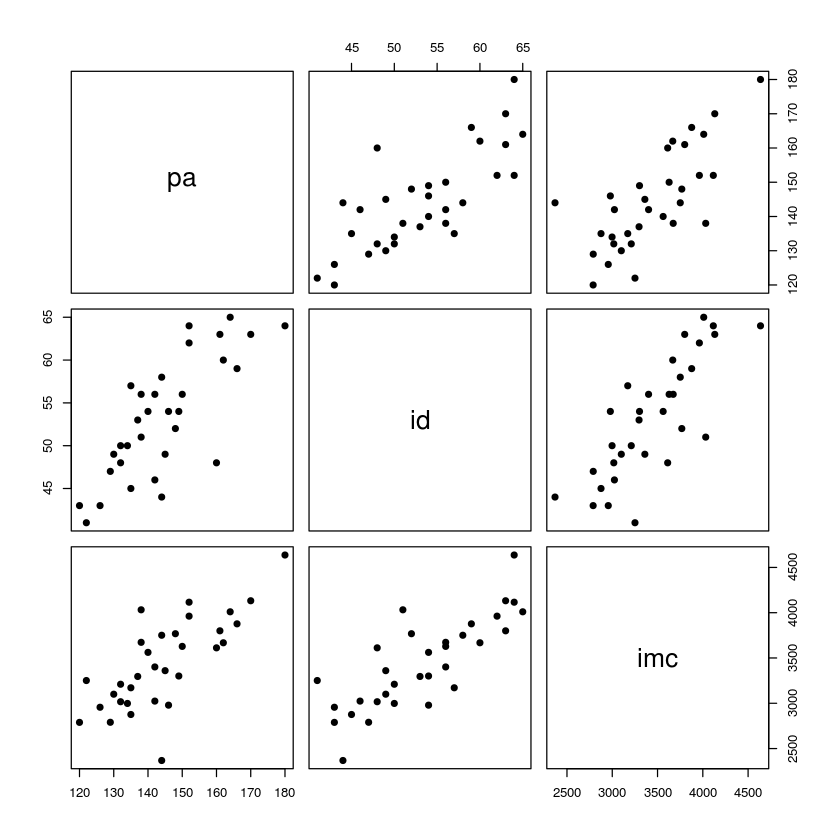

In [5]:
#Gráfico de dispersão
plot(df[,2:4],pch=19,cex=1)

In [6]:
#Matriz de correlação
cor(df[,2:4])

,pa,id,imc
pa,1.0000000,0.7752041,0.7420041
id,0.7752041,1.0000000,0.8027510
imc,0.7420041,0.8027510,1.0000000


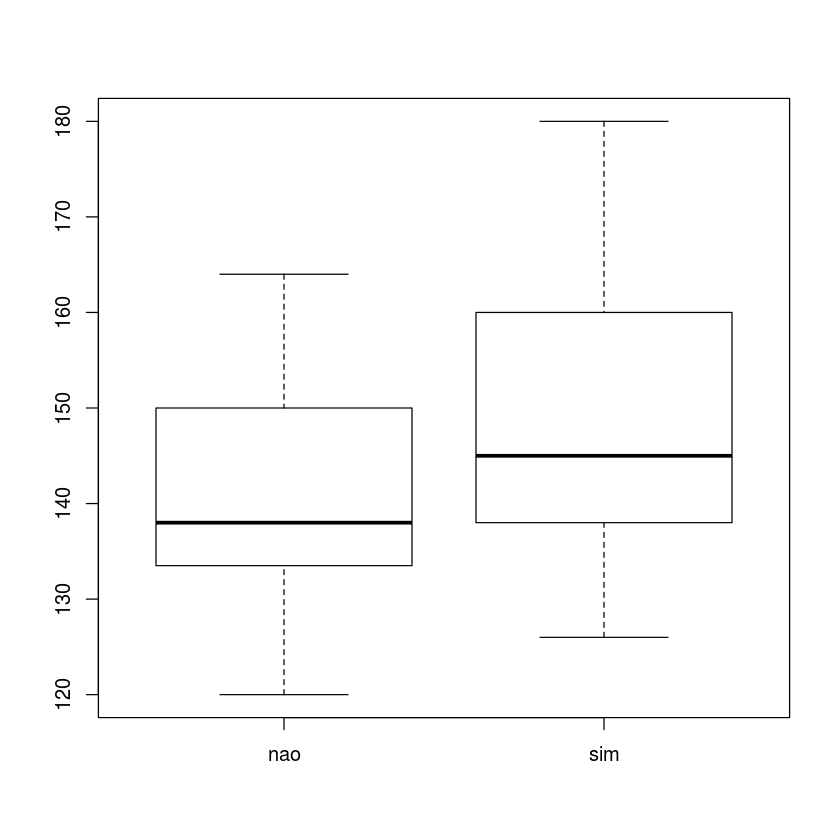

In [7]:
#Boxplot
boxplot(df$pa~df$hf,pch=19,cex=1)

Dada as análises podem responder as hipóteses:

1 - A variável resposta aparenta ser uma distribuição bimodal que é ocasionado pelo atributo fumantes e não fumantes. Quando decidiu-se por realizar sua separação podemos notar que o histograma de ambas se assemelha a uma normal. A análise de intervalo também indica tal proximidade com a normal. Assim, não temos fortes evidências para rejeitar tal hipótese. Logo, iremos considerar a normalidade da pressão arterial. <br>

2 - Como pode ser visto pela nuvem de pontos no gráfico de dispersão e pela matriz de correlação, nós temos uma linearidade grande entre as variáveis independentes para com a resposta. <br>

3 - Analisando o boxplot é possível verificar que há um shift(deslocamento) na distribuição dos fumantes. Como pode ser visto pela sua distribuição, aparentemente existe uma diferença entre fumantes e não fumantes, indicando que o fumo ocasiona em uma pressão arterial maior.

## Modelagem

Após esse melhor entendimento dos dados iremos gerar vários modelos lineares generalizados e após isso realizaremos uma comparação entre eles.

In [8]:
#Geração dos modelos
M1 <- with(df, glm(pa ~ hf, family = gaussian(link="identity")))
M2 <- with(df, glm(pa ~ id + hf, family = gaussian(link="identity")))
M3 <- with(df, glm(pa ~ imc + hf, family = gaussian(link="identity")))
M4 <- with(df, glm(pa ~ imc + id + hf, family = gaussian(link="identity")))

In [9]:
#Teste anova
anova(M1, M2, test='F')
anova(M2, M4, test='F')
anova(M3, M4, test='F')

Resid. Df,Resid. Dev,Df,Deviance,F,Pr(>F)
30,6032.871,NA,NA,NA,NA
29,1736.285,1,4296.586,71.76301,2.466629e-09


Resid. Df,Resid. Dev,Df,Deviance,F,Pr(>F)
29,1736.285,NA,NA,NA,NA
28,1536.143,1,200.1415,3.648072,0.06642678


Resid. Df,Resid. Dev,Df,Deviance,F,Pr(>F)
29,2305.602,NA,NA,NA,NA
28,1536.143,1,769.4592,14.02529,0.0008288266


Analisando os valores gerados pelos resíduos pode-se acreditar que o modelo M4 é o melhor deles por ter o menor desvio residual. Contudo, deve-se lembrar que não podemos ter colineariedade entre as variáveis do modelo, fato que ocorre em M4 entre os atributos id e imc. Assim, esse não é um modelo aceitável.

Desse modo, nos sobra os modelos M1,M2 e M3. Do teste de anova sabemos que M2 é melhor que M1, portanto, devemos decidir se M2 é melhor que M3 ou o contrário. Como os modelos não são encaixados, devemos realizar tal tarefa olhando o seu akaike (AIC).

In [10]:
#Teste para modelos não encaixados
cat("AIC M2:",extractAIC(M2),"\n")
cat("AIC M3:",extractAIC(M3))

AIC M2: 3 226.6126 
AIC M3: 3 235.6876

Podemos verificar, então, que o modelo a ser escolhido é o M2 por ter o menor AIC. Salientamos contudo que a diferença é bem pequena entre eles, podendo-se escolher também M3.